<a href="https://colab.research.google.com/github/st20080675/OCR-collection/blob/main/OCR_with_Tesseract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# package install

In [12]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (9,087 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

# read image from url

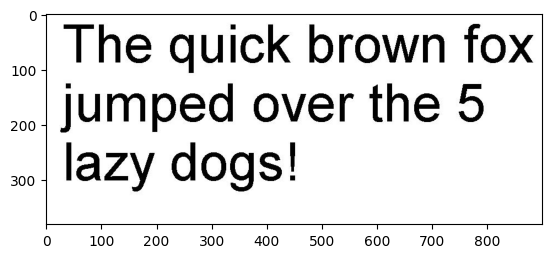

In [18]:
import urllib.request as urllib
import numpy as np
import matplotlib.pyplot as plt
import cv2

# url = 'https://upload.wikimedia.org/wikipedia/commons/0/04/1997_Ontario_license_plate_CAJA%E2%99%94723.jpg'
# url = 'https://i.etsystatic.com/24843103/r/il/3bd584/3774168167/il_570xN.3774168167_qw8l.jpg'
url = 'https://arturshams.files.wordpress.com/2015/07/sample1.jpg'

def image_url_to_numpy_array_urllib(url,format=None):
    ## read as HTTPResponse
    resp = urllib.urlopen(url)
    ## read as 1D bytearray
    resp_byte_array = resp.read()
    ## returns a bytearray object which is a mutable sequence of integers in the range 0 <=x< 256
    mutable_byte_array = bytearray(resp_byte_array)
    ## read as unsigned integer 1D numpy array
    image = np.asarray(mutable_byte_array, dtype="uint8")
    ## To decode the 1D image array into a 2D format with RGB color components we make a call to cv2.imdecode
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    if format=='BGR' :
        ## return BGR format array
        return image
    ## cv2.imdecode converted array into BGR format , convert it to RGB format
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # return the image
    return image

image=image_url_to_numpy_array_urllib(url=url,format='BGR')
plt.imshow(image)

# read text

In [20]:
from PIL import Image
import pytesseract
import numpy as np

# filename = 'image_01.png'
# image = np.array(Image.open(filename))

text = pytesseract.image_to_string(image)
print(text)

The quick brown fox
jumped over the 5
lazy dogs!

